In [1]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

import importlib
import matplotlib.pyplot as plt
import numpy as np

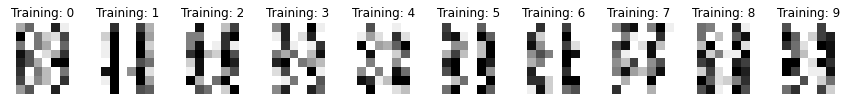

In [2]:
obfuscator = importlib.machinery.SourceFileLoader('obfuscator', './obfuscator.py').load_module()
X, y = obfuscator.get_obfuscated_dataset()
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 3))
for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
n_samples = len(X)
print(f"A total of {n_samples} images are in this dataset")

A total of 1797 images are in this dataset


In [4]:
from sklearn.linear_model import ElasticNet

data = X.reshape((n_samples, -1))

clf = ElasticNet()

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, y, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)
np.random.choice(a=predicted, size=100)

array([ 1.92810491,  3.95140562,  2.91418697,  2.31021492,  4.50536514,
        3.09844926,  1.61688362,  1.24221155,  3.816046  ,  1.08257086,
       -0.04273379,  3.19554704,  2.24937003,  2.28181661,  5.55789047,
        3.79633092,  1.48666927,  5.74363139,  4.11561923,  6.8668679 ,
        3.1120256 ,  4.66031342,  1.36708256,  7.09095803,  7.91058524,
        1.28478875,  2.86732824,  5.96507292,  3.97692493,  1.27325709,
        6.54024027,  3.01305536,  4.40321062,  3.17944861,  2.2100775 ,
        5.16295133,  6.98340045,  2.37138075,  3.39645126,  2.2100775 ,
        7.44854919,  1.20802261,  4.54724882,  6.62734898,  2.94371059,
        6.42111229,  7.17569456,  5.05130861,  2.3439711 ,  1.32416281,
        6.26684665,  3.17967906,  6.66696547,  3.10184241,  8.98741247,
        3.63684655,  6.77946878,  3.97692493,  6.78326292,  4.26129788,
        7.80460595,  7.81960415,  9.16762577,  7.068288  ,  2.80626564,
        8.10186753,  6.67797999,  6.02481354,  4.36591969,  5.62

In [5]:
# This model is very naive, we need to convert regression results to discrete results.
predicted = np.rint(predicted)
np.random.choice(a=predicted, size=100)

array([6., 6., 9., 6., 8., 7., 6., 4., 6., 4., 7., 2., 4., 4., 4., 4., 2.,
       5., 5., 7., 8., 6., 3., 7., 8., 4., 4., 7., 2., 5., 5., 5., 8., 8.,
       4., 1., 3., 6., 7., 8., 2., 7., 6., 4., 3., 7., 4., 6., 2., 8., 2.,
       1., 3., 5., 7., 8., 5., 4., 5., 4., 4., 6., 6., 7., 5., 7., 5., 2.,
       6., 7., 4., 6., 6., 2., 3., 3., 1., 8., 4., 4., 2., 1., 8., 2., 5.,
       4., 7., 4., 4., 3., 4., 5., 4., 4., 3., 7., 8., 3., 2., 4.])

In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier ElasticNet():
              precision    recall  f1-score   support

           0       0.86      0.07      0.13        88
           1       0.00      0.00      0.00        91
           2       0.36      0.40      0.38        86
           3       0.12      0.16      0.14        91
           4       0.14      0.23      0.17        92
           5       0.24      0.42      0.30        91
           6       0.15      0.24      0.19        91
           7       0.36      0.51      0.42        89
           8       0.26      0.12      0.17        88
           9       0.50      0.05      0.10        92

    accuracy                           0.22       899
   macro avg       0.30      0.22      0.20       899
weighted avg       0.30      0.22      0.20       899




Confusion matrix:
[[ 6 16 30 23 12  1  0  0  0  0]
 [ 0  0 12 29 38 11  1  0  0  0]
 [ 0 17 34 21 10  4  0  0  0  0]
 [ 0  0  7 15 30 25  9  5  0  0]
 [ 0  9  6 22 21 17 11  4  2  0]
 [ 1  0  1  0 10 38 24 16  1  0]
 [ 0  0  2  4 11 32 22 16  4  0]
 [ 0  0  0  0  2  6 27 45  9  0]
 [ 0  0  1  3 11 14 28 15 11  5]
 [ 0  0  1  7  6 13 20 24 16  5]]


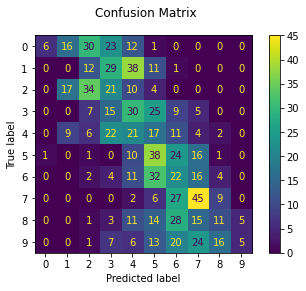

In [7]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()